In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/Mall_Customers.csv")

In [3]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


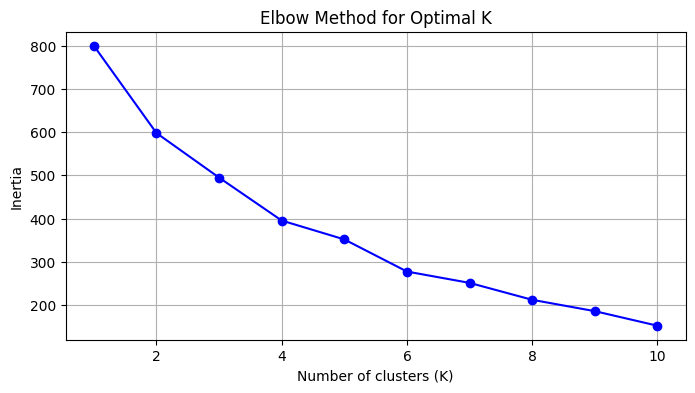

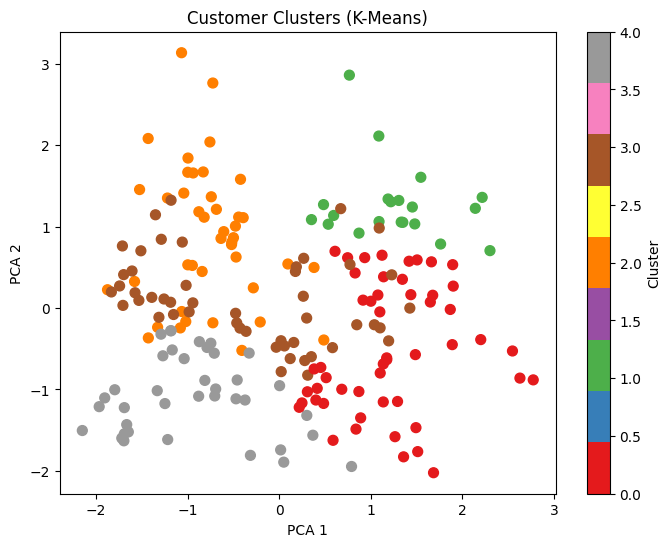

Silhouette Score: 0.272


In [4]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
# 1. Load and Preprocess
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male=1, Female=0
# Drop CustomerID
X = df.drop('CustomerID', axis=1)
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Optional: PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2. Fit K-Means (initial trial with k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 3. Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# 4. Visualize clusters (2D PCA)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Clusters (K-Means)')
plt.colorbar(label='Cluster')
plt.show()

# 5. Evaluate with Silhouette Score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.3f}")
